<a href="https://colab.research.google.com/github/CliffBooth/telecom_labs/blob/main/code/lab9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Get thinkdsp.py
import os
if not os.path.exists('thinkdsp.py'):
    !wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
from thinkdsp import *
from IPython.core.interactiveshell import InteractiveShell
import numpy as np
import matplotlib.pyplot as plt
InteractiveShell.ast_node_interactivity = 'all'

--2022-06-02 07:27:56--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2022-06-02 07:27:56--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48687 (48K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  47.55K  --.-KB/s    in 0.007s  

2022-06-02 07:27:56 (6.44 MB/s) - ‘thinkdsp.py’ saved [48687/48687]



# **Лабораторная работа №9**

**Exercise #9.1**

The goal of this exercise is to explore the effect of diff and
differentiate on a signal. Create a triangle wave and plot it. Apply
diff and plot the result. Compute the spectrum of the triangle wave, apply
differentiate, and plot the result. Convert the spectrum back to a wave and
plot it. Are there differences between the effect of diff and differentiate
for this wave?

Треугольный сигнал:

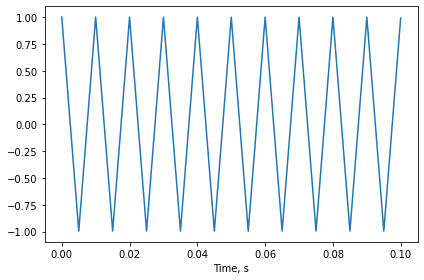

In [8]:
wave = TriangleSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

Применим `diff` к сигналу:

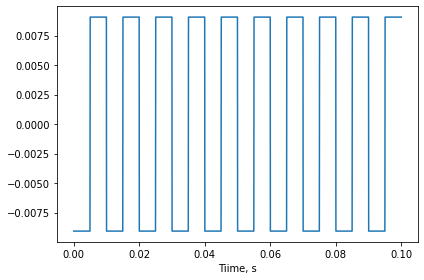

In [9]:
diff = wave.diff()
diff.plot()
decorate(xlabel='Tiime, s')

Получили прямоугольный сигнал.

Когда мы берем спектральную производную, мы получаем «звон» вокруг разрывов:

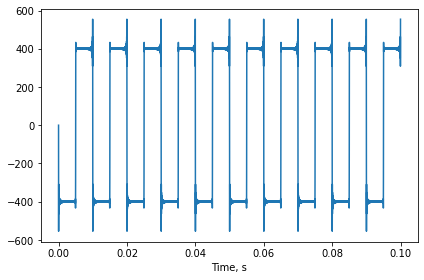

In [10]:
differentiate = wave.make_spectrum().differentiate().make_wave()
differentiate.plot()
decorate(xlabel='Time, s')

Это происходит потому, что производная не определена в местах разрывов.



**Exercise #9.2**

The goal of this exercise is to explore the effect of cumsum and
integrate on a signal. Create a square wave and plot it. Apply cumsum and
plot the result. Compute the spectrum of the square wave, apply integrate,
and plot the result. Convert the spectrum back to a wave and plot it. Are
there differences between the effect of cumsum and integrate for this wave?

Квадратный сигнал:

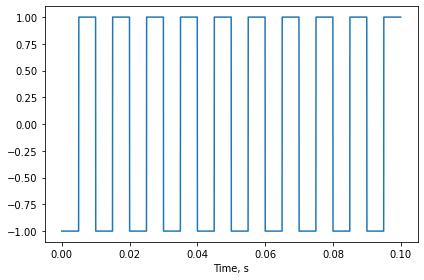

In [11]:
square = SquareSignal(freq=100).make_wave(duration=0.1, framerate=44100)
square.plot()
decorate(xlabel='Time, s')

Применим `cumsum`:

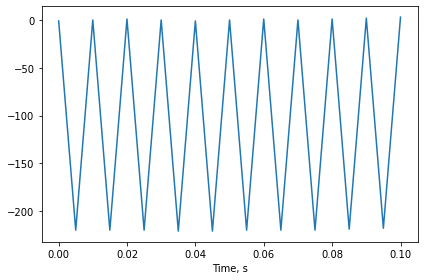

In [15]:
out1 = square.cumsum()
out1.plot()
decorate(xlabel='Time, s')

Нарастающая сумма квадратного сигнала - это треугольный сигнал.

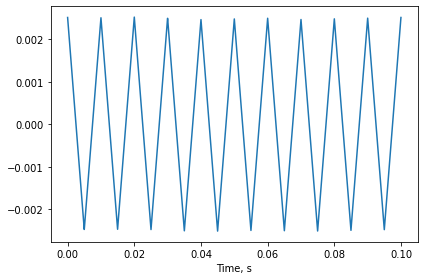

In [14]:
spectrum = square.make_spectrum().integrate()
spectrum.hs[0] = 0
out2 = spectrum.make_wave()
out2.plot()
decorate(xlabel='Time, s')

Интеграл спектра также является треугольным сигналом.

Если нормализировать эти две волны, можно увидеть, что между ними разницы практичеси нет.

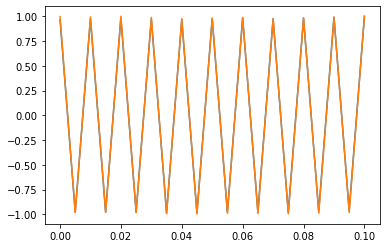

In [24]:
out1.unbias()
out1.normalize()
out2.normalize()
out1.plot()
out2.plot()

**Exercise #9.3**


The goal of this exercise is the explore the effect of integrating
twice. Create a sawtooth wave, compute its spectrum, then apply integrate
twice. Plot the resulting wave and its spectrum. What is the mathematical
form of the wave? Why does it resemble a sinusoid?

Создадим пилообразный сигнал:

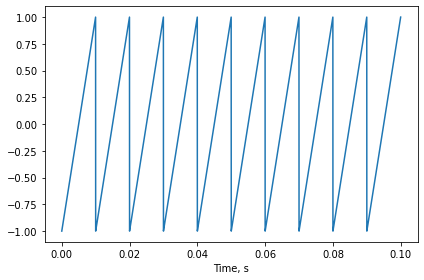

In [25]:
wave = SawtoothSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()
decorate(xlabel='Time, s')

Дважды интегрируем спектр:

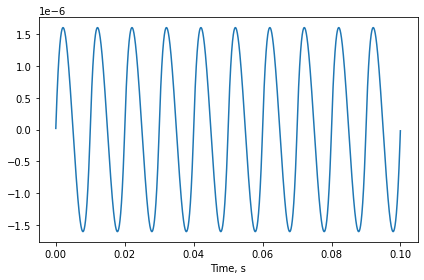

In [30]:
spectrum = wave.make_spectrum().integrate().integrate()
spectrum.hs[0] = 0

out1 = spectrum.make_wave()
out1.plot()
decorate(xlabel='Time, s')

Результат похож на синусоиду. Причина этого в том, что интегрирование является фильтром низких частот, и мы отфильтровали почти все частоты, кроме фундаментальной.

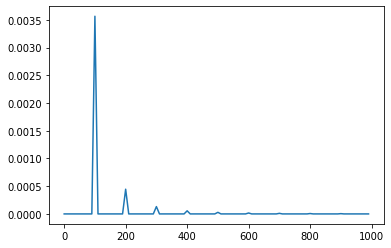

In [32]:
out1.make_spectrum().plot(high=1000)

**Exercise #9.4**

The goal of this exercise is to explore the effect of the 2nd difference and 2nd derivative. Create a CubicSignal, which is defined in thinkdsp.
Compute the second difference by applying diff twice. What does the result
look like? Compute the second derivative by applying differentiate to the
spectrum twice. Does the result look the same?
Plot the filters that corresponds to the 2nd difference and the 2nd derivative
and compare them. Hint: In order to get the filters on the same scale, use a
wave with framerate 1.

Создадим `CubicSignal`:

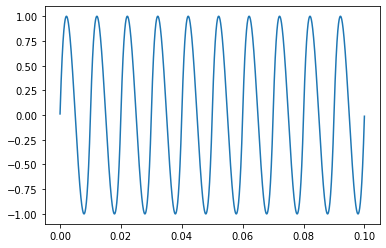

In [33]:
wave = CubicSignal(freq=100).make_wave(duration=0.1, framerate=44100)
wave.plot()

Вторая разность - пилообразный сигнал:

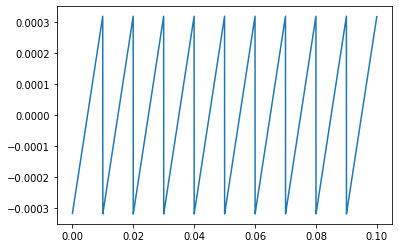

In [35]:
wave1= wave.diff().diff()
wave1.plot()

Вторая производная:

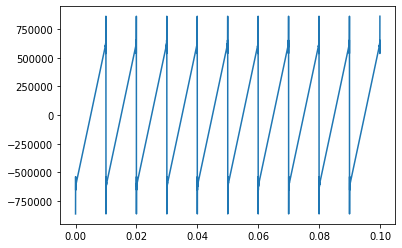

In [36]:
spectrum = wave.make_spectrum().differentiate().differentiate()
differentiated = spectrum.make_wave()
differentiated.plot()

При двойном дифференцировании получаем пилообразный сигнал со звоном. Проблема, опять же, в том, что производная в этих точках не определена.

Фильтры, соответствующие второй разнице производной:

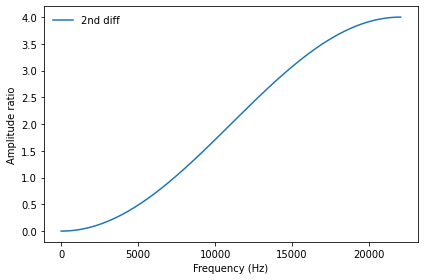

In [39]:
diff_window = np.array([-1.0, 2.0, -1.0])
padded = zero_pad(diff_window, len(wave))
diff_wave = Wave(padded, framerate=wave.framerate)
diff_filter = diff_wave.make_spectrum()
diff_filter.plot(label='2nd diff')

decorate(xlabel='Frequency (Hz)',
                 ylabel='Amplitude ratio')

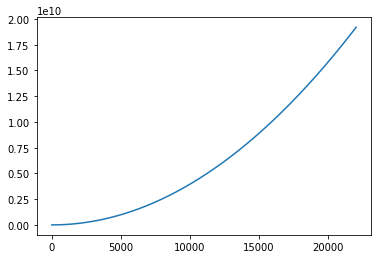

In [41]:
deriv_filter = wave.make_spectrum()
deriv_filter.hs = (PI2 * 1j * deriv_filter.fs)**2
deriv_filter.plot()

Оба являются фильтрами верхних частот, которые усиливают высокочастотные компоненты. Вторая производная является параболой, поэтому она больше всего усиливает самые высокие частоты. 2-я разность является хорошей аппроксимацией 2-й производной только на самых низких частотах, далее она отклоняется.